In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [199]:
#Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"
#Якщо я використовую тільки read_html, отримую помилку 403, тому вирішив додатково використовувати urllib.request
req = urllib.request.Request(
    "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",
    headers={"User-Agent": "Mozilla/5.0"}
)
html = urllib.request.urlopen(req).read()
tables = pd.read_html(html, flavor="bs4")

df = next(
    t for t in tables
    if any(str(col) in ["1950", "1960", "1970", "1980", "1990", "2000", "2010", "2019"]
           for col in t.columns)
)


In [200]:
#Вивести перші рядки таблиці за допомогою методу head
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [201]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
df.shape

(28, 9)

In [202]:
#Замініть у таблиці значення "—" на значення NaN
df = df.replace("—", np.nan)

In [203]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [204]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [205]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_fraction = df.isnull().sum() / len(df)
missing_fraction

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

In [206]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.iloc[:-1]

In [207]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = df.fillna(df.mean(numeric_only=True))

In [208]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
avg_2019 = df["2019"].mean()
better_2019 = df[df["2019"] > avg_2019]["Регіон"]
better_2019

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

In [209]:
#У якому регіоні була найвища народжуваність у 2014 році?
top_2014 = df.loc[df["2014"].idxmax(), "Регіон"]
top_2014

'Рівненська'

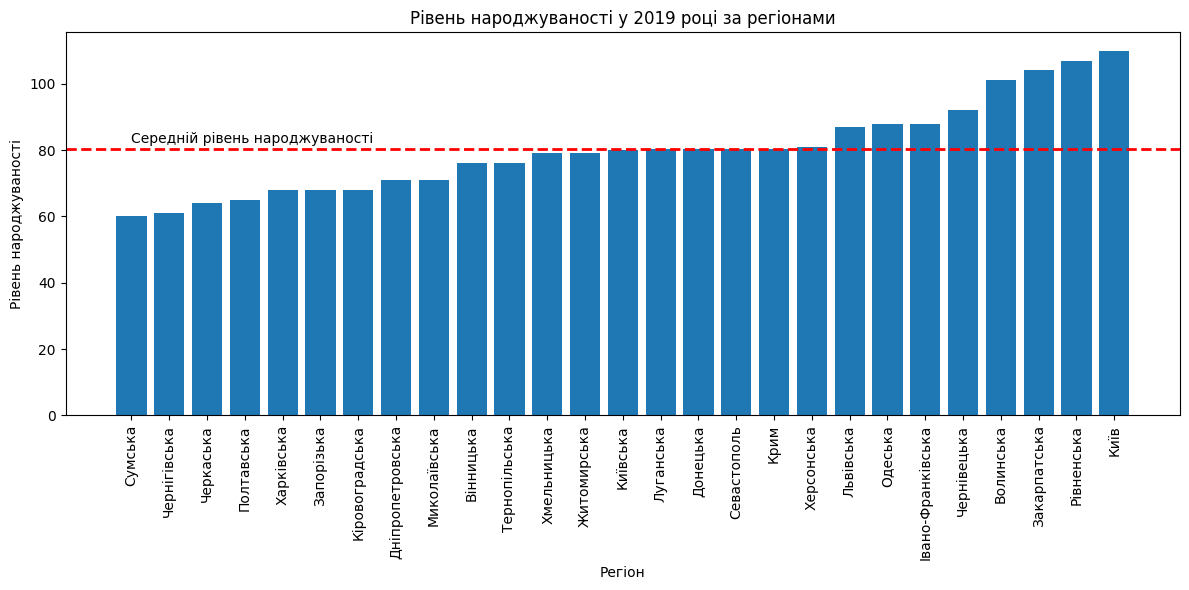

In [210]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
df_sorted = df.sort_values("2019")
plt.figure(figsize=(12, 6))
plt.bar(df_sorted["Регіон"], df_sorted["2019"])
plt.xticks(rotation=90)
plt.title("Рівень народжуваності у 2019 році за регіонами")
plt.xlabel("Регіон")
plt.ylabel("Рівень народжуваності")
plt.tight_layout()
plt.axhline(avg_2019, color="red", linestyle="--", linewidth=2, label=f"Mean = {avg_2019:.2f}")
plt.text(0,avg_2019+2,"Середній рівень народжуваності")
plt.show()